<a href="https://colab.research.google.com/github/treezy254/Titanic-Dataset/blob/master/titanicipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Libs

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

### Importing data

In [3]:
data = pd.read_csv('train.csv', index_col=0)
data.drop(columns = ['Name', 'Embarked', 'Ticket'], axis=1, inplace=True)
y = data.Survived
features = ['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin']
X = data[features]

# Split data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2)

# Check for missing values
data.isnull().any()

Survived    False
Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Fare        False
Cabin        True
dtype: bool

### Create the model

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

def survived(X_train, X_valid, y_train, y_valid):
  model = DecisionTreeClassifier()
  model.fit(X_train, y_train)
  preds = model.predict(X_valid)
  tree.plot_tree(model)
  return mean_absolute_error(y_valid, preds)

### Encoding categorical data

In [21]:
# Categorical columns in the training data

object_cols = [col for col in X_train.columns if X_train[col].dtype == 'object']

# Columns that will be one-hot-encoded
low_cardinality_cols = [col for col in object_cols if X_train[col].nunique() < 10]

# Columns that will be dropped from the dataset
high_cardinality_cols = list(set(object_cols)-set(low_cardinality_cols))

### One Hot Encoding

In [22]:
from sklearn.preprocessing import OneHotEncoder

OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[low_cardinality_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_valid[low_cardinality_cols]))

OH_cols_train.index = X_train.index
OH_cols_valid.index = X_valid.index

num_X_train = X_train.drop(object_cols, axis=1)
num_X_valid = X_valid.drop(object_cols, axis=1)

OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)

OH_X_train.columns = OH_X_train.columns.astype(str)
OH_X_valid.columns = OH_X_valid.columns.astype(str)
# X.columns = X.columns.astype(str)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [23]:
OH_X_train.isnull().any()

Age       True
SibSp    False
Parch    False
Fare     False
0        False
1        False
dtype: bool

### Imputing missing values

In [24]:
from sklearn.impute import SimpleImputer

my_imputer = SimpleImputer()

imputed_X_train = pd.DataFrame(my_imputer.fit_transform(OH_X_train))
imputed_X_valid = pd.DataFrame(my_imputer.transform(OH_X_valid))

imputed_X_train.columns = X_train.columns
imputed_X_valid.columns = X_valid.columns


0.24022346368715083

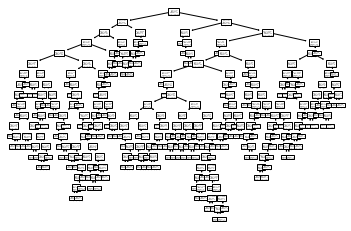

In [26]:
survived(imputed_X_train, imputed_X_valid, y_train, y_valid)

### Visualizing


In [31]:
y_train.value_counts()

0    443
1    269
Name: Survived, dtype: int64

In [33]:
print(abs(443/712 * 100))
print(abs(269/712 * 100))

62.21910112359551
37.78089887640449
